In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/streamflow_prediction_dataset_dropped_cols.csv')
display(df)

,date,WTEQ_BisonLake,WTEQ_McClurePass,PREC_BisonLake,PREC_McClurePass,TAVG_BisonLake,TAVG_McClurePass,soilmoisture_station378_2ft,soilmoisture_station378_8ft,soilmoisture_station378_20ft,...,soilmoisture_station457_20ft,soilmoisture_station607_4ft,soilmoisture_station607_8ft,soilmoisture_station607_20ft,soilmoisture_station680_2ft,soilmoisture_station680_8ft,soilmoisture_station680_20ft,soilmoisture_station802_2ft,soilmoisture_station802_8ft,soilmoisture_station802_20ft
0,2008-03-12,28.6,23.9,29.1,22.9,19.4,30.2,32.2,35.4,23.9,...,20.9,10.2,24.2,25.8,14.6,11.7,26.0,4.0,1.3,6.5
1,2008-03-15,29.2,24.5,29.7,23.4,11.7,23.4,32.1,35.6,24.1,...,20.9,10.3,24.4,25.4,14.7,11.7,26.2,4.0,1.4,6.9
2,2008-03-17,29.3,24.8,29.8,23.6,14.4,24.3,32.2,35.6,24.2,...,21.0,10.3,24.7,25.2,14.4,12.1,26.1,4.1,1.4,6.7
3,2008-03-18,29.3,24.8,29.8,23.6,11.8,23.9,32.2,35.6,24.2,...,21.2,10.6,24.9,25.3,14.7,12.1,26.0,4.0,1.4,6.6
4,2008-03-19,29.4,24.9,29.8,23.6,20.8,30.2,32.2,35.6,24.2,...,21.1,10.6,25.0,25.1,14.6,11.7,25.9,4.0,1.6,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,2021-07-23,0.0,0.0,27.7,20.7,52.9,62.1,21.2,17.1,18.4,...,1.5,13.8,14.5,11.5,35.5,14.2,30.2,24.1,5.5,9.2
2992,2021-07-24,0.0,0.0,27.7,21.1,54.7,57.0,19.6,17.0,18.4,...,1.6,13.4,14.1,11.3,33.7,13.9,30.2,24.0,5.3,8.7
2993,2021-07-25,0.0,0.0,27.8,21.5,52.7,57.6,19.7,16.8,18.4,...,1.4,13.1,13.9,10.8,39.8,13.8,30.2,23.8,5.0,8.1
2994,2021-07-26,0.0,0.0,27.8,21.5,57.0,61.2,25.2,16.8,18.4,...,1.2,12.9,13.9,10.4,37.7,14.1,30.2,23.7,4.8,7.0


In [3]:
# Identifying and averaging columns with "PREC" and "TAVG"
prec_columns = [col for col in df.columns if "PREC" in col]
tavg_columns = [col for col in df.columns if "TAVG" in col]

# Averaging the PREC and TAVG columns
df['PREC_Avg'] = df[prec_columns].mean(axis=1)
df['TAVG_Avg'] = df[tavg_columns].mean(axis=1)

# Identifying soil moisture columns by depth and averaging them dynamically
soilmoisture_depths = ['2ft', '4ft', '8ft', '20ft']
for depth in soilmoisture_depths:
    soilmoisture_columns = [col for col in df.columns if f"soilmoisture" in col and depth in col]
    if soilmoisture_columns:
        df[f'soilmoisture_Avg_{depth}'] = df[soilmoisture_columns].mean(axis=1)

# Dropping only the original columns used in the averaging, not the new averaged columns
columns_to_drop = prec_columns + \
    tavg_columns + \
        [col for col in df.columns if "soilmoisture" in col and col not in df.columns[-len(soilmoisture_depths):]]
df_final = df.drop(columns=columns_to_drop)

df_final = df_final.set_index('date')
df_final.to_csv('data/streamflow_prediction_dataset_averaged_cols.csv')
display(df_final)

,WTEQ_BisonLake,WTEQ_McClurePass,PREC_Avg,TAVG_Avg,soilmoisture_Avg_2ft,soilmoisture_Avg_4ft,soilmoisture_Avg_8ft,soilmoisture_Avg_20ft
date,,,,,,,,
2008-03-12,28.6,23.9,26.00,24.80,17.375,10.2,17.74,20.62
2008-03-15,29.2,24.5,26.55,17.55,17.375,10.3,17.88,20.70
2008-03-17,29.3,24.8,26.70,19.35,17.425,10.3,18.04,20.64
2008-03-18,29.3,24.8,26.70,17.85,17.475,10.6,18.06,20.66
2008-03-19,29.4,24.9,26.70,25.50,17.425,10.6,18.06,20.64
...,...,...,...,...,...,...,...,...
2021-07-23,0.0,0.0,24.20,57.50,21.250,13.8,14.60,14.16
2021-07-24,0.0,0.0,24.40,55.85,20.275,13.4,14.38,14.04
2021-07-25,0.0,0.0,24.65,55.15,21.800,13.1,14.24,13.78


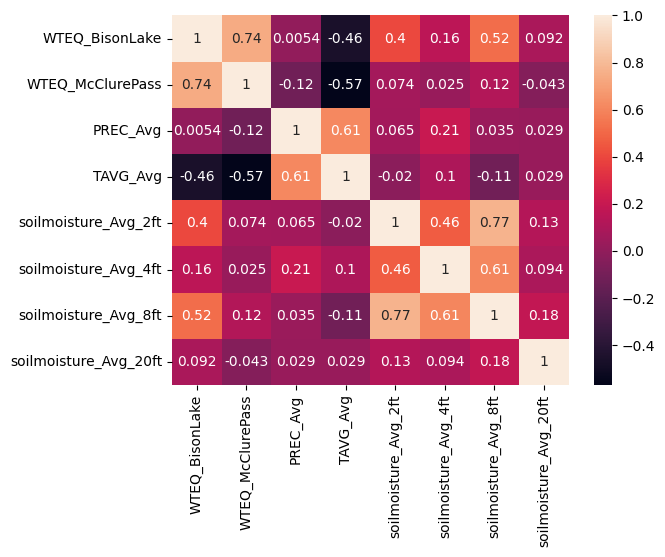

In [4]:
# Corr plot
sns.heatmap(df_final.corr(), annot=True)
plt.show()

In [5]:
# PCA 3 Components
scaler = StandardScaler()
scaler.fit(df_final)
scaled_data = scaler.transform(df_final)

pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")

Explained variance ratio: 0.7410008019014971


In [6]:
x_pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])
x_pca_df.to_csv('data/streamflow_prediction_dataset_pca.csv')

In [7]:
# Loadings
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=df_final.columns
)

display(loadings)

,PC1,PC2,PC3
WTEQ_BisonLake,0.497955,-0.183066,-0.328210
WTEQ_McClurePass,0.352926,-0.394528,-0.435644
PREC_Avg,-0.052566,0.441095,-0.665005
TAVG_Avg,-0.277844,0.534101,-0.209983
soilmoisture_Avg_2ft,0.436094,0.294634,0.169407
soilmoisture_Avg_4ft,0.315327,0.386690,0.049965
soilmoisture_Avg_8ft,0.495560,0.274834,0.183762
soilmoisture_Avg_20ft,0.111063,0.138321,0.388850


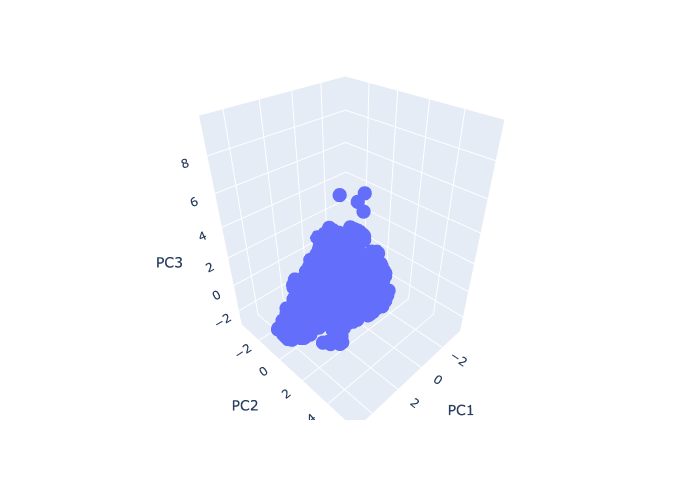

In [8]:
# 3D Plot
fig = px.scatter_3d(
    x=x_pca[:,0], 
    y=x_pca[:,1], 
    z=x_pca[:,2], 
    labels={
        'x': 'PC1', 
        'y': 'PC2', 
        'z': 'PC3'
    }
)

fig.show("png")

In [9]:
# PCA 2 Components
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")

Explained variance ratio: 0.6084890287448601


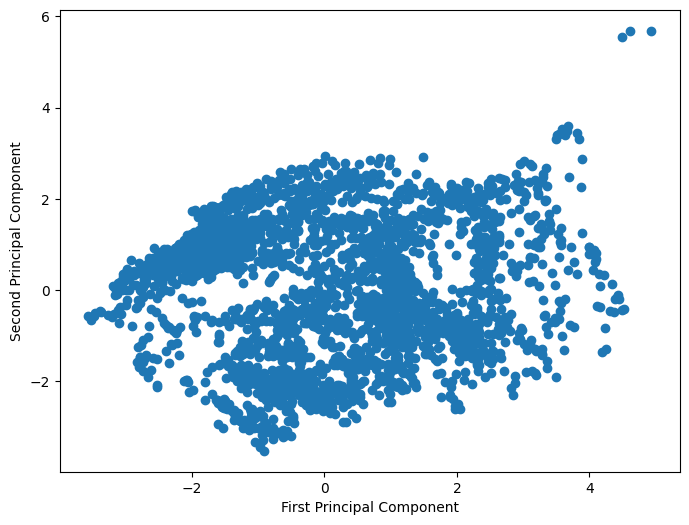

In [10]:
# 2D Plot
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

How many components are needed to attain at least 95% of the variance of this dataset?

In [11]:
# PCA >95% explained variance ratio
for i in range(1, len(df_final.columns)):
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    if pca.explained_variance_ratio_.sum() > 0.95:
        print(f"Number of components: {i}")
        break
    
pca = PCA(n_components=i)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")
display(x_pca)

Number of components: 6
Explained variance ratio: 0.9601600406294081


array([[ 1.76389574, -2.35196846, -2.27267027,  1.03494896,  0.25632147,
         0.47177285],
       [ 1.96467502, -2.60582904, -2.26658516,  1.03564982,  0.17733779,
         0.3367471 ],
       [ 1.97491624, -2.55189082, -2.31504949,  1.04876267,  0.19527908,
         0.38190608],
       ...,
       [-1.42983787,  0.79763789,  0.06373772, -0.04160527,  0.83965854,
         0.71349838],
       [-1.43235217,  0.96569096,  0.0395898 , -0.04953814,  0.97037452,
         0.87139566],
       [-1.63548575,  0.93390702, -0.05131443,  0.02569397,  0.88502306,
         0.77966624]])

In [12]:
# Top 3 eigenvalues
eigenvalues = pca.explained_variance_
eigenvalues = eigenvalues / eigenvalues.sum()
top_3_eigenvalues = eigenvalues[:3]
display(top_3_eigenvalues)

array([0.36065468, 0.2730824 , 0.13801009])